In [33]:
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, OneHotEncoder)

from warnings import filterwarnings
filterwarnings("ignore")
sns.set_style("whitegrid")
jtplot.style(context='notebook', theme='chesterish', grid=True, ticks=True, figsize=(10, 6))

## Boston Housing Data:

- We consider three possible tasks:
    1. A __supervised predictive task__, where the outcome variable of interest is the median value of a home in the tract __(MEDV)__. <br><br>
    2. A __supervised classification task__, where the outcome variable of interest is the binary variable CAT.MEDV that indicates whether the home value is above or below _$30,000_. <br><br>
    3. An __unsupervised task__, where the goal is to __cluster census tracts__.<br><br>

__(MEDV and CAT.MEDV are not used together in any of the three cases)__

In [10]:
boston = load_boston()
pd.DataFrame(boston.data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
pd.DataFrame(boston.target).head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [19]:
cols = boston.feature_names
cols

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [35]:
raw_df = pd.DataFrame(data = boston.data, columns = cols)
raw_df['MEDV'] = boston.target

raw_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [27]:
raw_df.shape

(506, 14)

## EDA:

In [39]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [40]:
raw_df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

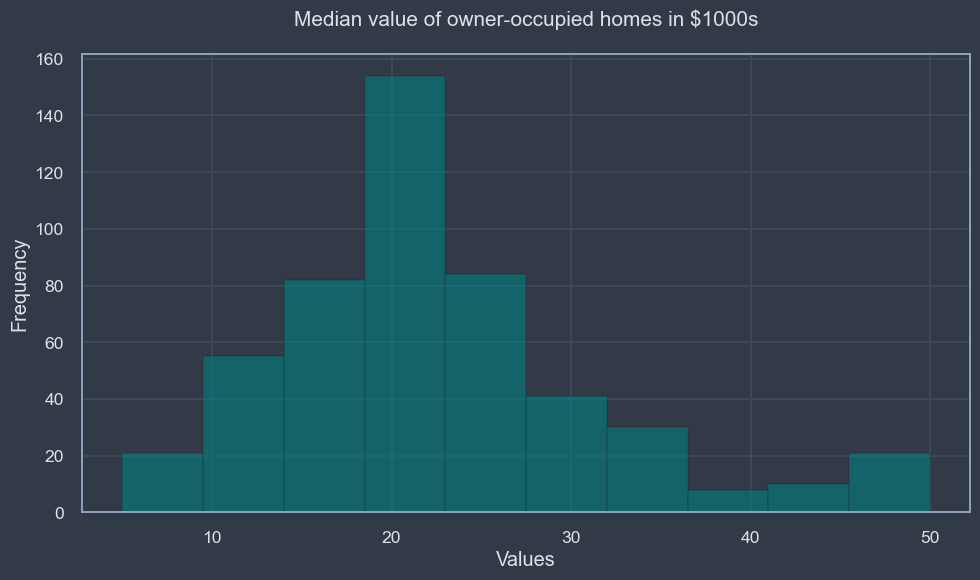

In [82]:
# -- Distribution of variables (data).
plt.title("Median value of owner-occupied homes in $1000s", size = 15, pad  = 20)
raw_df['MEDV'].plot.hist( color = 'teal', edgecolor = "black", alpha = .6 )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.tight_layout()

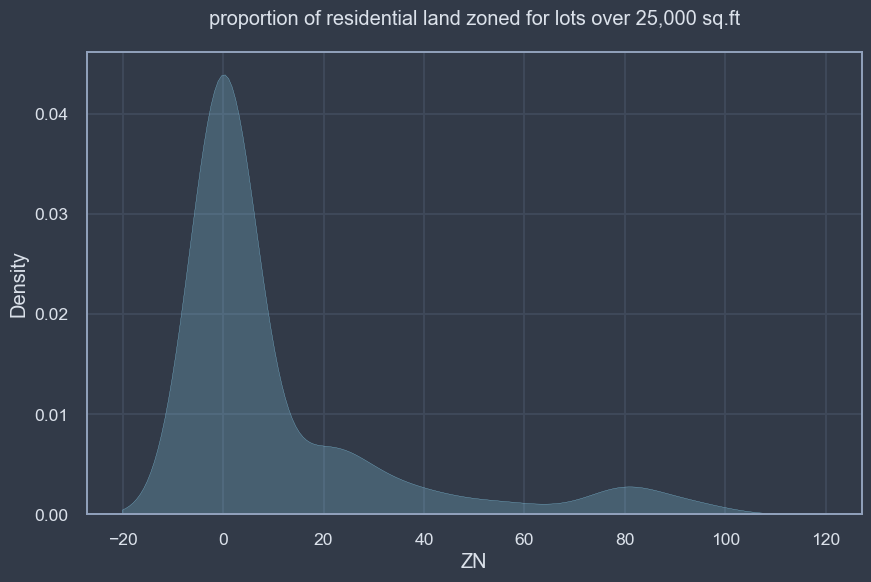

In [53]:
""" ZN: proportion of residential land zoned for lots over 25,000 sq.ft. """
plt.title("proportion of residential land zoned for lots over 25,000 sq.ft", pad = 20)
sns.kdeplot(data = raw_df, x = 'ZN', fill = True, color = 'skyblue',);

In [74]:
# -- Houses in which where some people are older than 90 years. (OUTLIER)
# -- definitely people can live longer lif
# -- back then people used to live long enough compared to today.
filt = raw_df['AGE'] >= 90
len(raw_df.loc[filt])

170

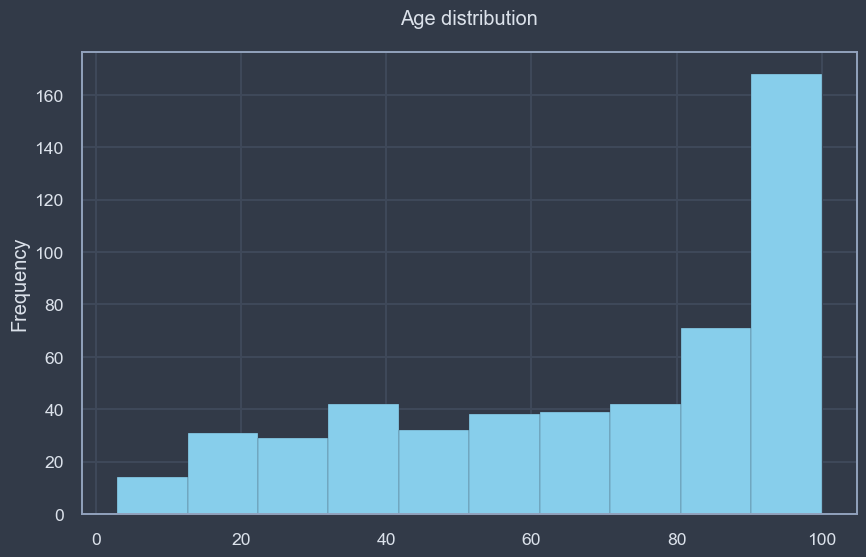

In [66]:
plt.title("Age distribution", pad = 20)
raw_df['AGE'].plot.hist(color = 'skyblue', );

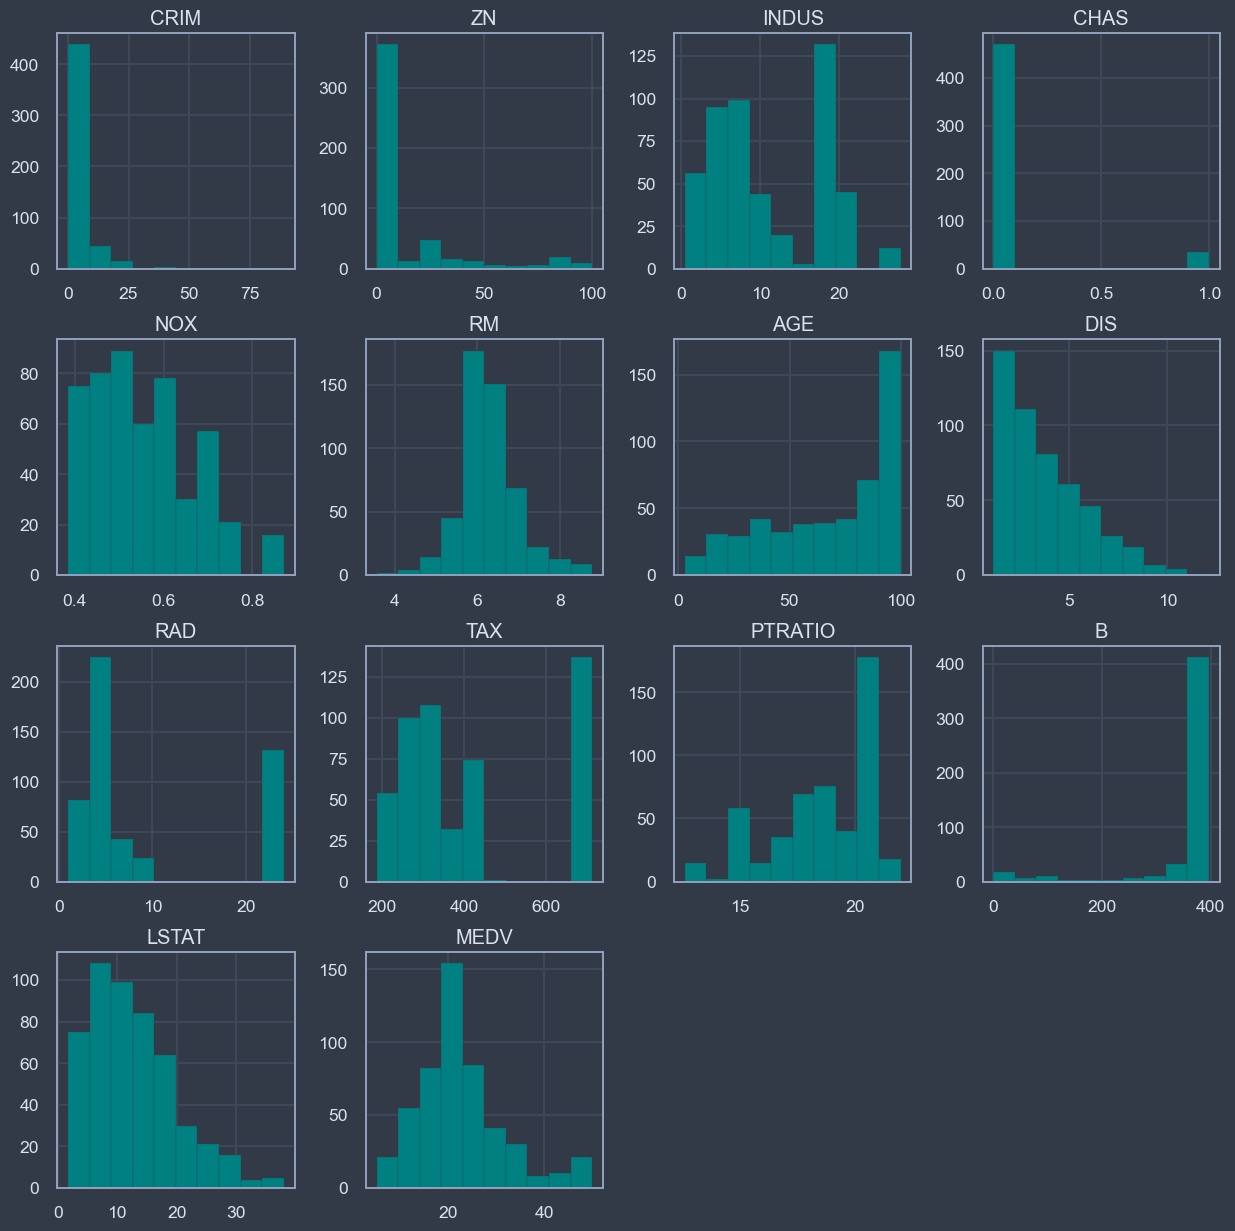

In [83]:
raw_df.hist(color = 'teal', figsize = (15, 15), );

In [85]:
print(raw_df.head(), boston.DESCR, sep = "\n\n")

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - Z

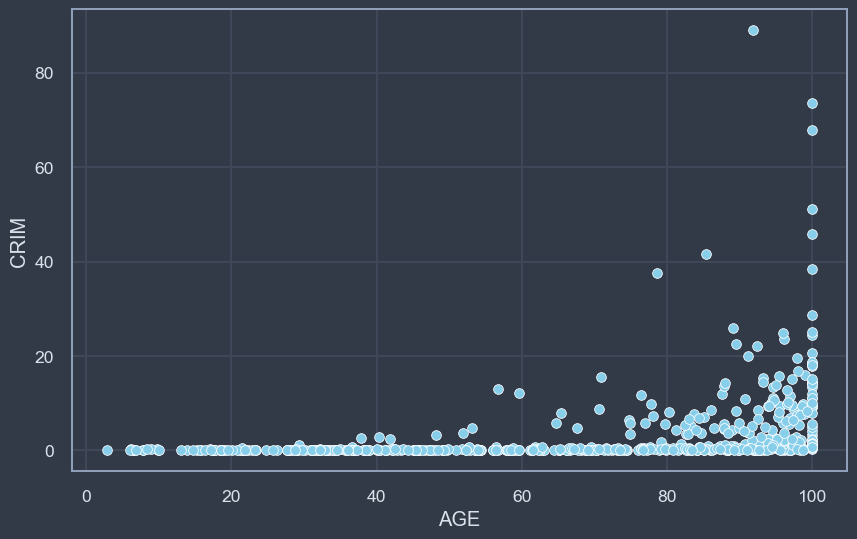

In [118]:
sns.scatterplot(x = 'AGE', y = 'CRIM', data = raw_df, color = 'skyblue', );

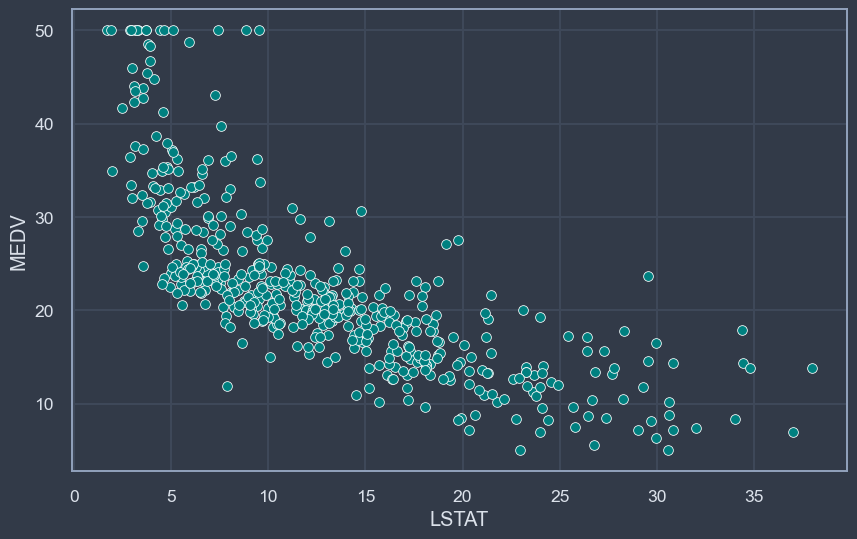

In [117]:
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = raw_df, color='teal', );

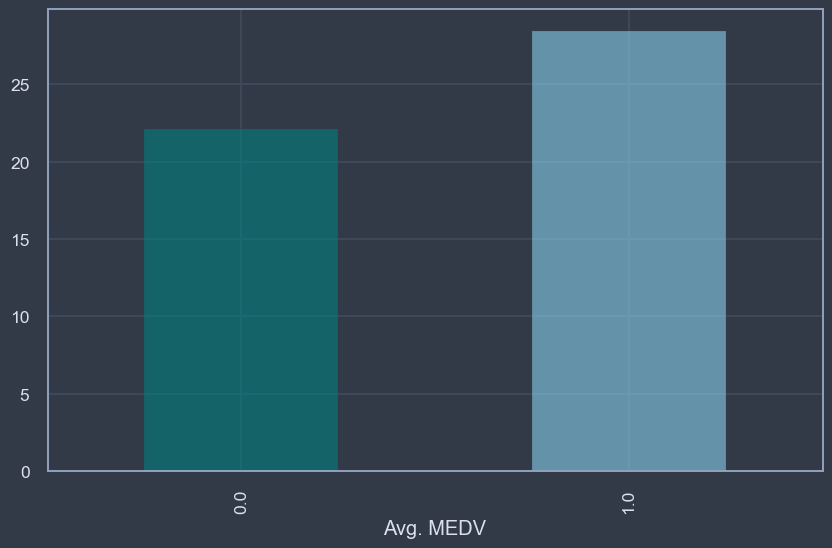

In [126]:
""" CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). 
    * Compute mean MEDV per CHAS = (0, 1)
"""
ax = raw_df.groupby("CHAS").mean()["MEDV"].plot(kind = 'bar', color = ['teal', 'skyblue'], alpha = .6,)
ax.set_xlabel("Avg. MEDV");

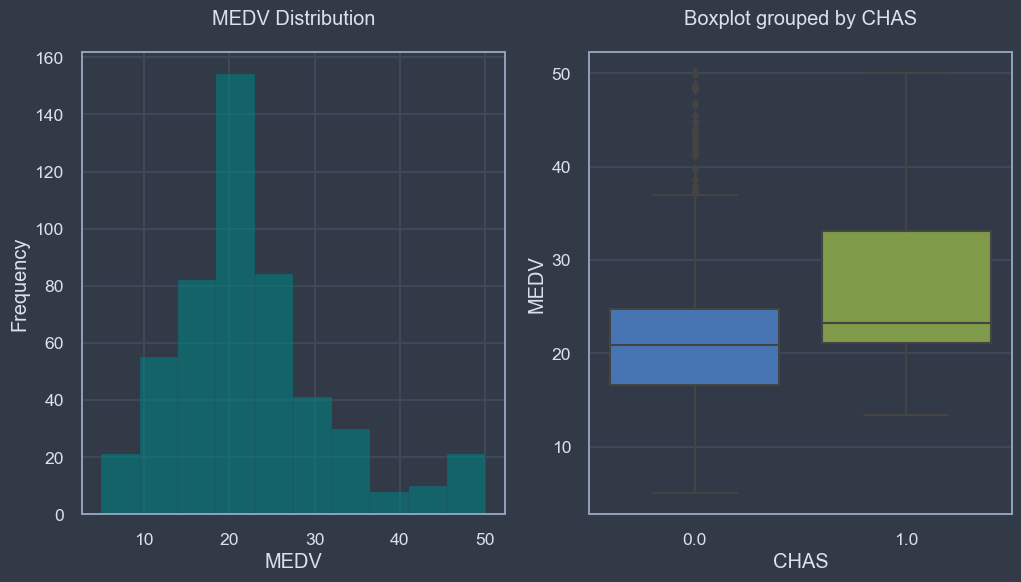

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 
raw_df['MEDV'].plot.hist(color = 'teal', alpha = .6, ax = ax1 )

sns.boxplot(data = raw_df, x = 'CHAS', y = 'MEDV', ax = ax2, )

ax1.set_xlabel("MEDV")
ax1.set_title("MEDV Distribution", pad = 20)
ax2.set_xlabel("CHAS")
ax2.set_title("Boxplot grouped by CHAS", pad = 20)
fig.show()